In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
%matplotlib inline

In [2]:
from sqlalchemy import create_engine
import pandas as pd

# создаём движок SQLAlchemy
engine = create_engine("postgresql://postgres:postgres@db:5432/shop")

# читаем данные
df = pd.read_sql("SELECT * FROM orders", engine)

df.head()

,id,created_at,product_name,price,quantity,user_region
0,1,2025-12-24 15:00:22.098139,Laptop Stand,93.36,3,EU
1,2,2025-12-24 15:00:23.100242,Mouse,178.75,2,Asia
2,3,2025-12-24 15:00:24.103812,Laptop Stand,70.20,4,Africa
3,4,2025-12-24 15:00:25.113607,Monitor,128.72,2,EU
4,5,2025-12-24 15:00:26.137373,Laptop Stand,28.13,4,Asia


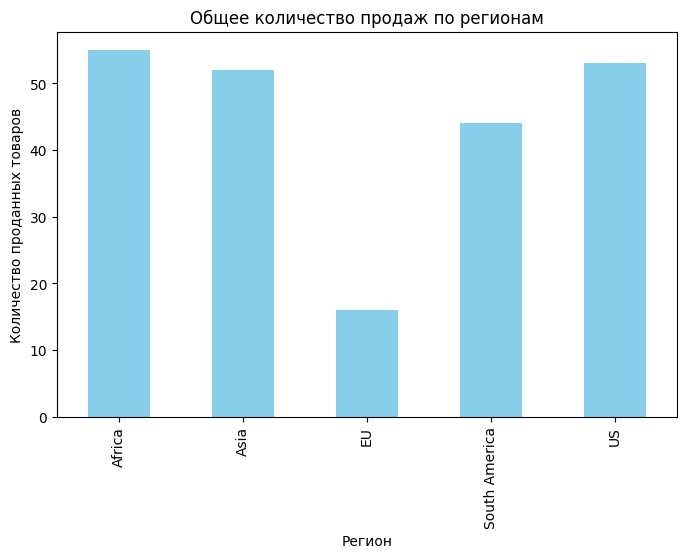

In [3]:
region_sales = df.groupby("user_region")["quantity"].sum()
plt.figure(figsize=(8,5))
region_sales.plot(kind="bar", color="skyblue")
plt.title("Общее количество продаж по регионам")
plt.xlabel("Регион")
plt.ylabel("Количество проданных товаров")
plt.show()


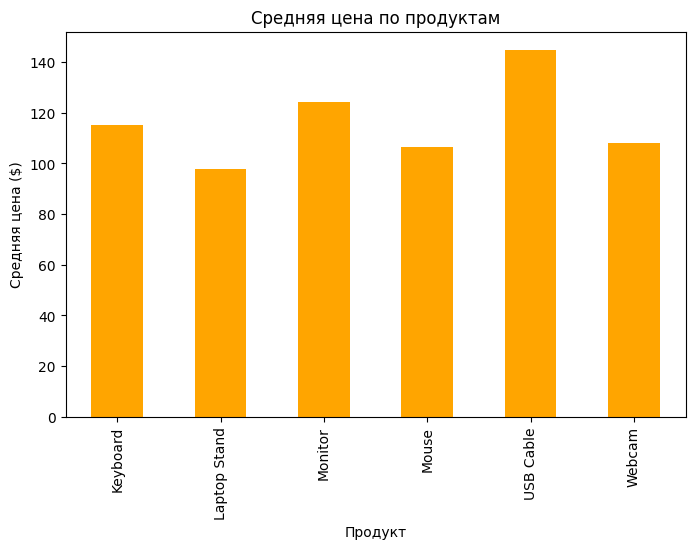

In [4]:
avg_price = df.groupby("product_name")["price"].mean()
plt.figure(figsize=(8,5))
avg_price.plot(kind="bar", color="orange")
plt.title("Средняя цена по продуктам")
plt.xlabel("Продукт")
plt.ylabel("Средняя цена ($)")
plt.show()


In [5]:
print("Общее количество заказов:", len(df))
print("Регион с наибольшим количеством продаж:", region_sales.idxmax())
print("Продукт с самой высокой средней ценой:", avg_price.idxmax())


Общее количество заказов: 81
Регион с наибольшим количеством продаж: Africa
Продукт с самой высокой средней ценой: USB Cable
